<a href="https://colab.research.google.com/github/SachinScaler/MachineLearning_Jan24/blob/main/ML1_Supervised_revision_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Business Case**

**Blinkit** is trying to find an **optimal number of delivery partners per store** for faster delivery

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2


Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 34.0MB/s]


In [ ]:
df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


Now lets see the count of sample each of the three classes

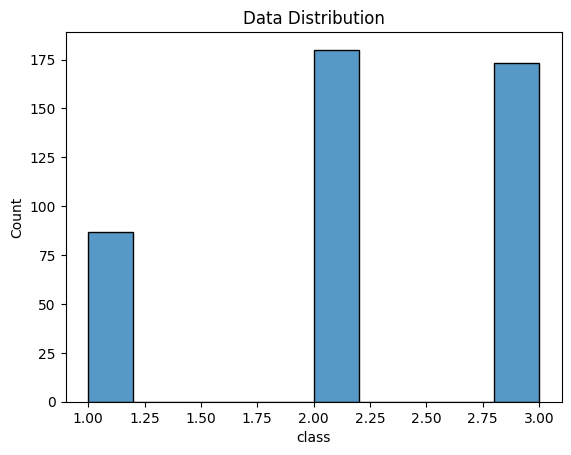

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="class")
plt.title('Data Distribution')
plt.show()

**quiz**

Lets now define our X and y for the model and visualize the data

In [ ]:
X=df[['Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen'	]].copy()
y=df[['class']].copy()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def scatter_visualize(visualize1,visualize2,y_label):
  scatter = plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
  plt.legend(handles=scatter.legend_elements()[0], labels=['Class1','Class2','Class3'])
  plt.show()

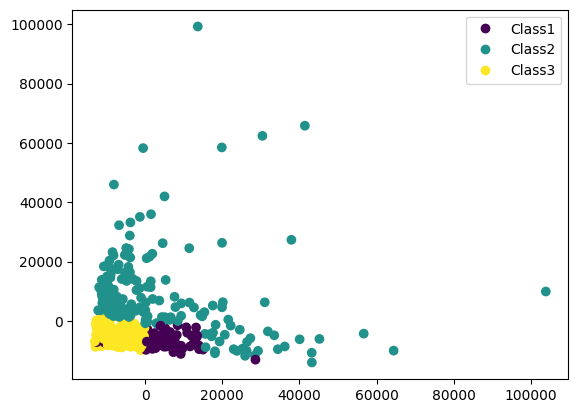

In [ ]:
# reducing features to just 2 features for visualization purpose
pca = PCA(n_components=2)
visualize = pca.fit_transform(X)


scatter_visualize(visualize[:,0] ,visualize[:,1],y.values[:,0])



**observe**

Data is not only **multi classed imbalanced** data
- It is also **Non-Linear in nature**



# **Geometric Intuition of kNN**

# **kNN Scratch Code**

lets split the data into train, validation and test set

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

In [ ]:
y_sm.value_counts()

class
1        99
2        99
3        99
dtype: int64

Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()

X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)

y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]

kNN Implementation from Scratch
 with k = 5

taking the 50th Val data as our $x_q$

In [ ]:
X_val_scaled[50]

array([ 0.73607101, -0.60813714, -0.46207814, -0.65274768, -0.32663492,
       -0.5085816 , -0.28410302])

finding distance

In [ ]:
dist = np.sqrt(np.sum((X_val_scaled[50]-X_sm)**2,axis=1) )

print(dist.shape)

(297,)


In [ ]:
# Storing distance and Class labels together
distances = [(dist[i],y_sm[i]) for i in range(len(dist)) ]

# sort the distances
distances = sorted(distances)

In [ ]:
# Nearest/First K points
distances = distances[:5]

In [ ]:
distances = np.array(distances)

classes_counts = np.unique(distances[:,1],return_counts=True)

index = classes_counts[1].argmax()
pred = classes_counts[0][index]

print('kNN prediction:',pred)

kNN prediction: 3.0


In [ ]:
print('Neighbors[(distance),(Label)]:',distances)

Neighbors[(distance),(Label)]: [[0.20233917 3.        ]
 [0.21347364 3.        ]
 [0.22790479 3.        ]
 [0.28152306 3.        ]
 [0.30105843 3.        ]]


Formulating into one function

In [ ]:
def knn(X,Y,queryPoint,k):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred),distances

Predicted class label for $x_q$

In [ ]:
pred,neighbors = knn(X_sm, y_sm, X_val_scaled[50],5)

print(f'k nearest neighbors with the distance and class label :{neighbors}')

print(f'The predicted class label: {pred}')

k nearest neighbors with the distance and class label :[[0.20233917 3.        ]
 [0.21347364 3.        ]
 [0.22790479 3.        ]
 [0.28152306 3.        ]
 [0.30105843 3.        ]]
The predicted class label: 3


**Observe**

All the 5 datapoints which are closest to the $x^q$ have:
- The same class labels = 3

Hence due to majority vote:
- $x^q$ → Class3

<br>

Lets see what is the actual class label for $x^q$

In [ ]:
y_val[50]

3

This means that kNN correctly predicted $x^q$



In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = []

for i in range(X_test_scaled.shape[0]):
    output,_ = knn(X_sm, y_sm, X_test_scaled[i],5)
    y_pred.append(output)




cm = confusion_matrix(y_test,y_pred)


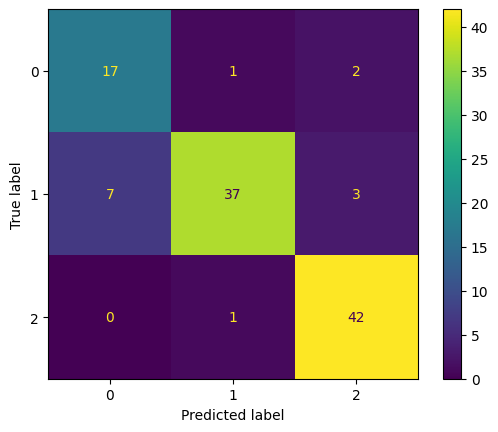

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.85      0.71      0.77        24
           2       0.79      0.95      0.86        39
           3       0.98      0.89      0.93        47

    accuracy                           0.87       110
   macro avg       0.87      0.85      0.86       110
weighted avg       0.88      0.87      0.87       110



**observe**

Clearly the kNN model performed quite well on the data, showing :
- kNN can handle Multi-Class problem
- kNN can handle Non-linearity in the data



# Sklearn's [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) implementation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Fit method stores the training datapoints in the kNN model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

knn.fit(X_sm, y_sm)


KNeighborsClassifier(metric='euclidean')

Accuracy of KNN on Test data

In [ ]:
knn.score(X_val_scaled, y_val)

0.8674698795180723

Precision, Recall, F1-Score of KNN on test data

In [ ]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_val_scaled)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.63      0.86      0.73        14
           2       0.97      0.84      0.90        38
           3       0.90      0.90      0.90        31

    accuracy                           0.87        83
   macro avg       0.83      0.87      0.84        83
weighted avg       0.89      0.87      0.87        83



Confusion Matrix of KNN on Test Data

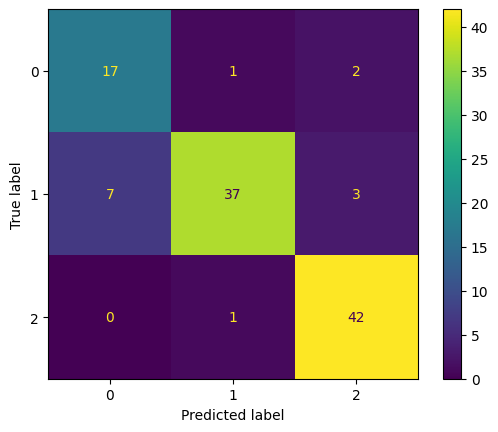

In [ ]:
y_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

**observe**

The model makes wrong prediction mostly on **Class 1**


#### How to perform hyperparameter tuning to make kNN fit better ?
Ans: for this lets first understand Bias-Variance of kNN

# **Bias-Variance Trade Off in kNN**

**observe**

1. training accuracy of kNN decreases as k increases
2. Validation accuracy of kNN first increases as k increases , then decreases

Hence we can say:
- when k → very small,
 - since **gap between training and validation accuracy is high**
 - kNN is being a very complex model, and hence it overfits

- when k → very large,
 - though the gap between training and validation accuracy is low, but **training accuracy is worse**
 - kNN is being a very simple model, and hence it underfits

Hyperparameter tuning of kNN

In [ ]:
Acc = []

# Calculating error for K values between 1 and 50
# Note: 51 is not included in the loop
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_sm, y_sm)

    Acc.append(knn.score(X_val_scaled,y_val))

Visualizing the error and K values

Text(0, 0.5, 'Accuracy')

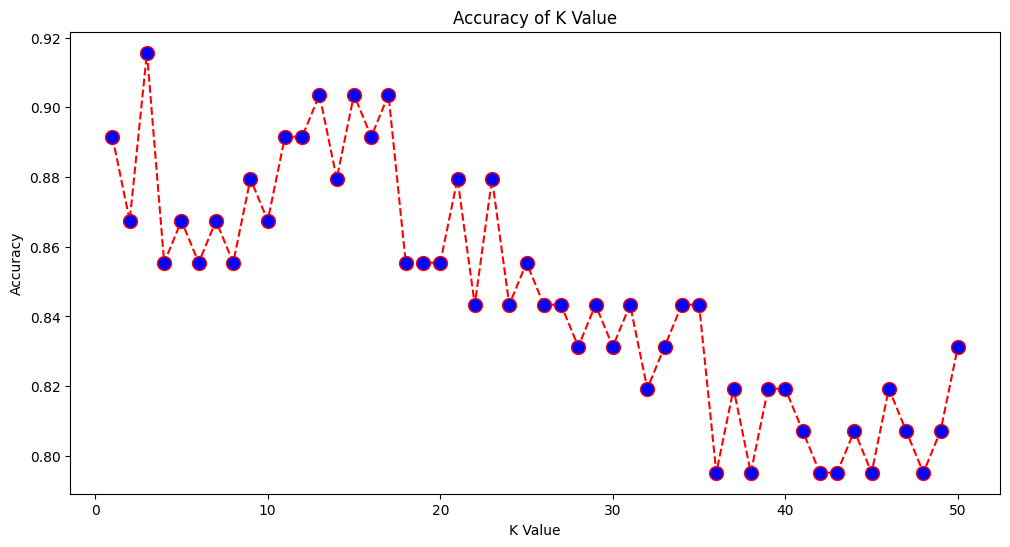

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), Acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

**observe**

From this accuracy plot, it is clear that:
- Highest accuracy attained when $k = 5$

- Meaning our intial kNN is the best model

Decision Boundary plot

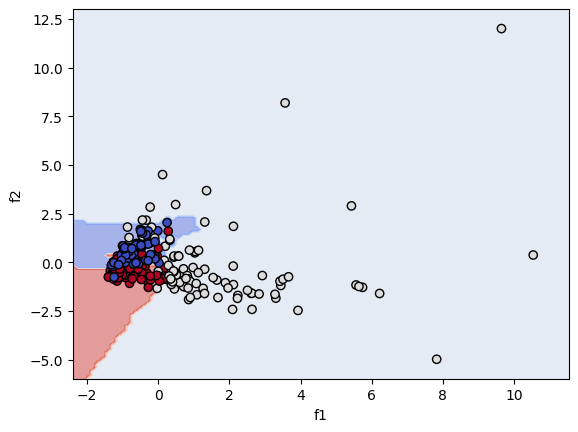

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

# Choosing the first 2 columns for the plot


pca = PCA(n_components=2)
X_train_cols = pca.fit_transform(X_sm)

# Creating and fitting the tree classifier

classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

classifier.fit(X_train_cols, y_sm)

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier,
                                              X_train_cols,
                                              response_method="predict",
                                              xlabel='f1', ylabel='f2',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(X_train_cols[:, 0], X_train_cols[:, 1],
                 c=y_sm, edgecolor="k",
                 cmap=plt.cm.coolwarm)


plt.show()

**observe**

We can clearly see:
- kNN creates a non-linear decision Boundary

1. **Class1** and its decision boundary → shown in **red**
2. **Class2** and its decision boundary → shown in **sky Blue**
3. **Class3** and its decision boundary → shown in **Blue**

Lets implement KNNImputator
- By creating a Dummy data having two nan  

In [ ]:
!gdown 1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS


Downloading...
From: https://drive.google.com/uc?id=1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
To: /content/knn_imputation.csv
100% 12.9k/12.9k [00:00<00:00, 32.7MB/s]


In [ ]:
import pandas as pd
import numpy as np

df_imp = pd.read_csv('knn_imputation.csv')
df_imp.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df_imp.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,3.0,6353.0,8808.0,NaN,2405.0,3516.0,7844.0
3,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [ ]:
df_imp.isna().sum()

Region               8
Fresh               13
Milk                15
Grocery              9
Frozen               8
Detergents_Paper    10
Delicassen          11
dtype: int64

**observe**

We have ```nan``` values for every feature

Lets see if kNN can impute these missing values

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler for feature scaling
    ('imputer', KNNImputer(n_neighbors=5))  # Step 2: KNNImputer for missing value imputation
])

# Fit and transform the data using the pipeline
X_transformed = pipeline.fit_transform(df_imp)

# Creating dataframe
X_transformed = pd.DataFrame(X_transformed,columns=df_imp.columns)

In [ ]:
X_transformed.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.555438,-0.233395,0.187310,-0.319038,-0.554681,-0.272830,-0.175386
1,0.555438,-0.616431,0.204632,-0.139260,-0.281917,-0.165147,-0.051741
2,0.555438,-0.664481,0.091925,0.200717,-0.168617,-0.126353,1.661231
3,0.555438,-0.192716,-0.764292,-0.618222,0.536025,-0.649809,-0.048353
4,0.555438,0.445450,-0.290291,-0.351554,0.097452,-0.428875,0.910606


In [ ]:
X_transformed.isna().sum()


Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

**observe**

kNN imputes every missing value for every feature
- This shows how good kNNImputator is

## UseCase Intro: Employee Attrition
### You are a Data Scientist working at a Jio

- The company is facing a huge problem of employee attrition
- Your task is to help the company find a solution to this problem.

#### Why is attrition a problem?

  - A new employee asks for more compensation
  - Training of new employees
  - Lots of time and resources required for searching a new candidate


#### Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [ ]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /content/HR-Employee-Attrition.csv
100% 228k/228k [00:00<00:00, 13.5MB/s]


In [ ]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Final dataset after preprocessing

In [ ]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 21.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 13.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 43.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 23.4MB/s]


In [ ]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [ ]:
# train data shape
X_train.shape

(1848, 36)

In [ ]:
# test data shape
X_test.shape

(368, 36)

In [ ]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,43,422,1,3,0.151584,4,0,33,3,2,...,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,42,188,29,3,0.127479,2,1,56,1,2,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35,992,1,3,0.127479,4,1,68,2,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
from IPython.display import IFrame

In [ ]:
IFrame(src="https://www.desmos.com/calculator/avaplvktso", width=700, height=375)

In case where there are more than 2 categories in a feature,
- we simply make a child node for each category

## Sklearn implemenation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Fetching data

In [ ]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 19.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 14.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 34.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 18.2MB/s]


In [ ]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

#### Reading data

#### Importing sklearn DT


sklearn DT doc - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#### Initiating instance

In [ ]:
model = DecisionTreeClassifier(criterion='entropy')

#### Fitting the model

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### Get the train / test score

In [ ]:
model.score(X_test, y_test)

0.7880434782608695

In [ ]:
model.score(X_train, y_train)

1.0

#### Visualizing DT

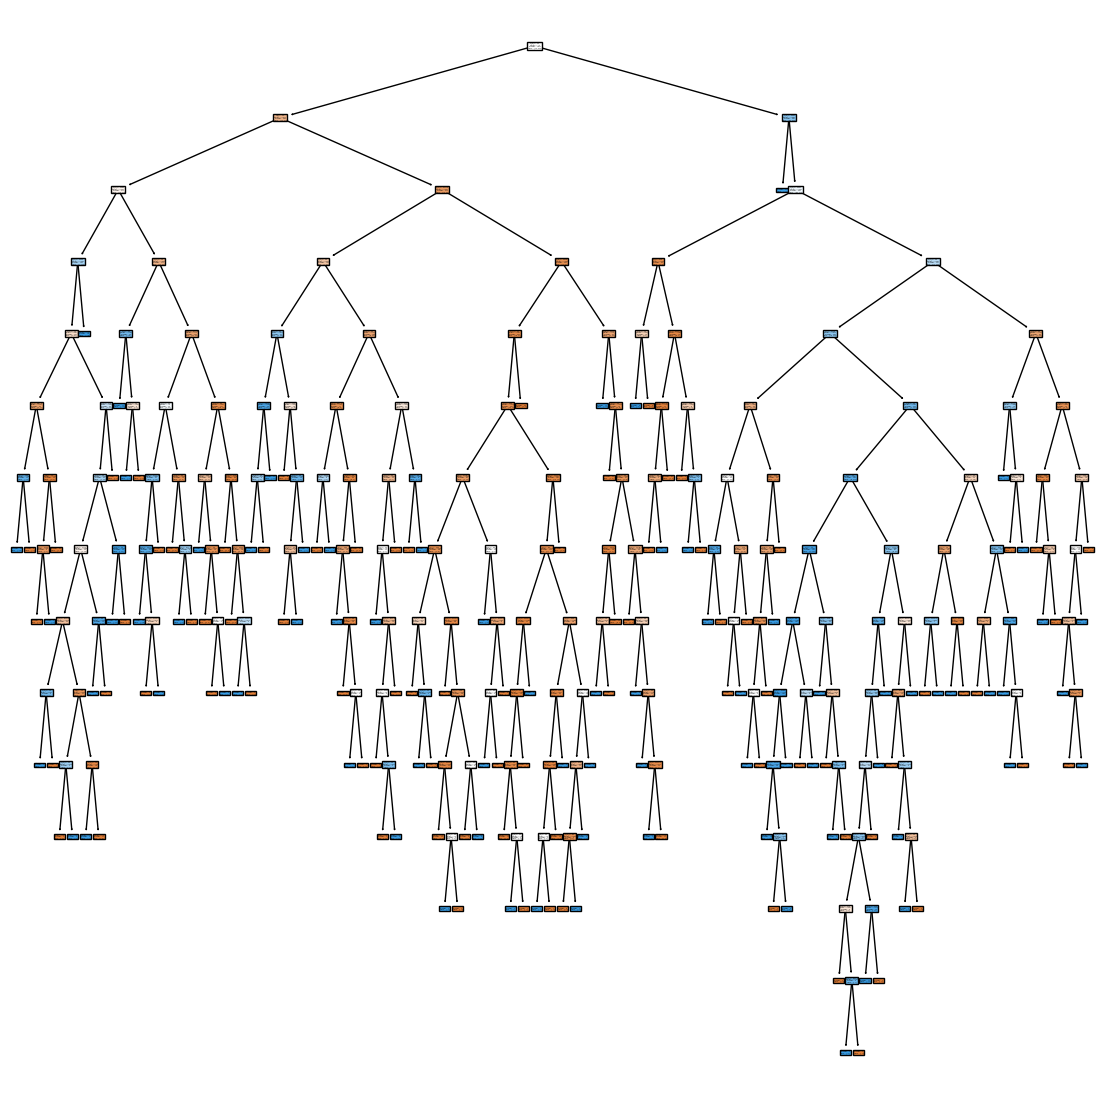

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(model, filled = True);

Notice that
- how deep is this DT is


#### How do we stop it from overfitting ?

We'll learn about how to handle bias variance tradeoff in DT in next lecture

#### Visualizing Gini Impurity

Desmos plot: https://www.desmos.com/calculator/yhcwubphxs

In [ ]:
from IPython.display import IFrame

IFrame(src="https://www.desmos.com/calculator/yhcwubphxs", width=700, height=375)

#### How do we calculate Information Gain for Gini Impurity?

$IG = GI_{parent~node} - Weighted~GI_{child~nodes}$

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 28.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 69.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 29.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 31.2MB/s]


In [ ]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score

kfold = KFold(n_splits=10)

depths = [3,4,5,67,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = kfold, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')

K-Fold for depth:3 Accuracy Mean: Train: 78.23483177413387 Validation: 76.47326674500587
K-Fold for depth: 3 Accuracy Std: Train: 1.203088267164511 Validation: 11.331241420327677
***************
K-Fold for depth:4 Accuracy Mean: Train: 83.50772540936214 Validation: 80.58049353701529
K-Fold for depth: 4 Accuracy Std: Train: 0.7889219949763586 Validation: 6.337951865133366
***************
K-Fold for depth:5 Accuracy Mean: Train: 87.36180052847033 Validation: 81.88366627497062
K-Fold for depth: 5 Accuracy Std: Train: 0.7888615077334944 Validation: 7.73770036081666
***************
K-Fold for depth:67 Accuracy Mean: Train: 100.0 Validation: 83.1316098707403
K-Fold for depth: 67 Accuracy Std: Train: 0.0 Validation: 10.55717457918392
***************
K-Fold for depth:9 Accuracy Mean: Train: 97.31242628012397 Validation: 83.7256169212691
K-Fold for depth: 9 Accuracy Std: Train: 0.3868329573758325 Validation: 10.103313333296661
***************
K-Fold for depth:11 Accuracy Mean: Train: 99.1101215

#### Training with the best parameters -

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=7, max_depth=4)
tree_clf=tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)

---

## How to **visualize** a DT?

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_train.columns)

# Ensure the target variable 'Attrition' is not there in the feature list

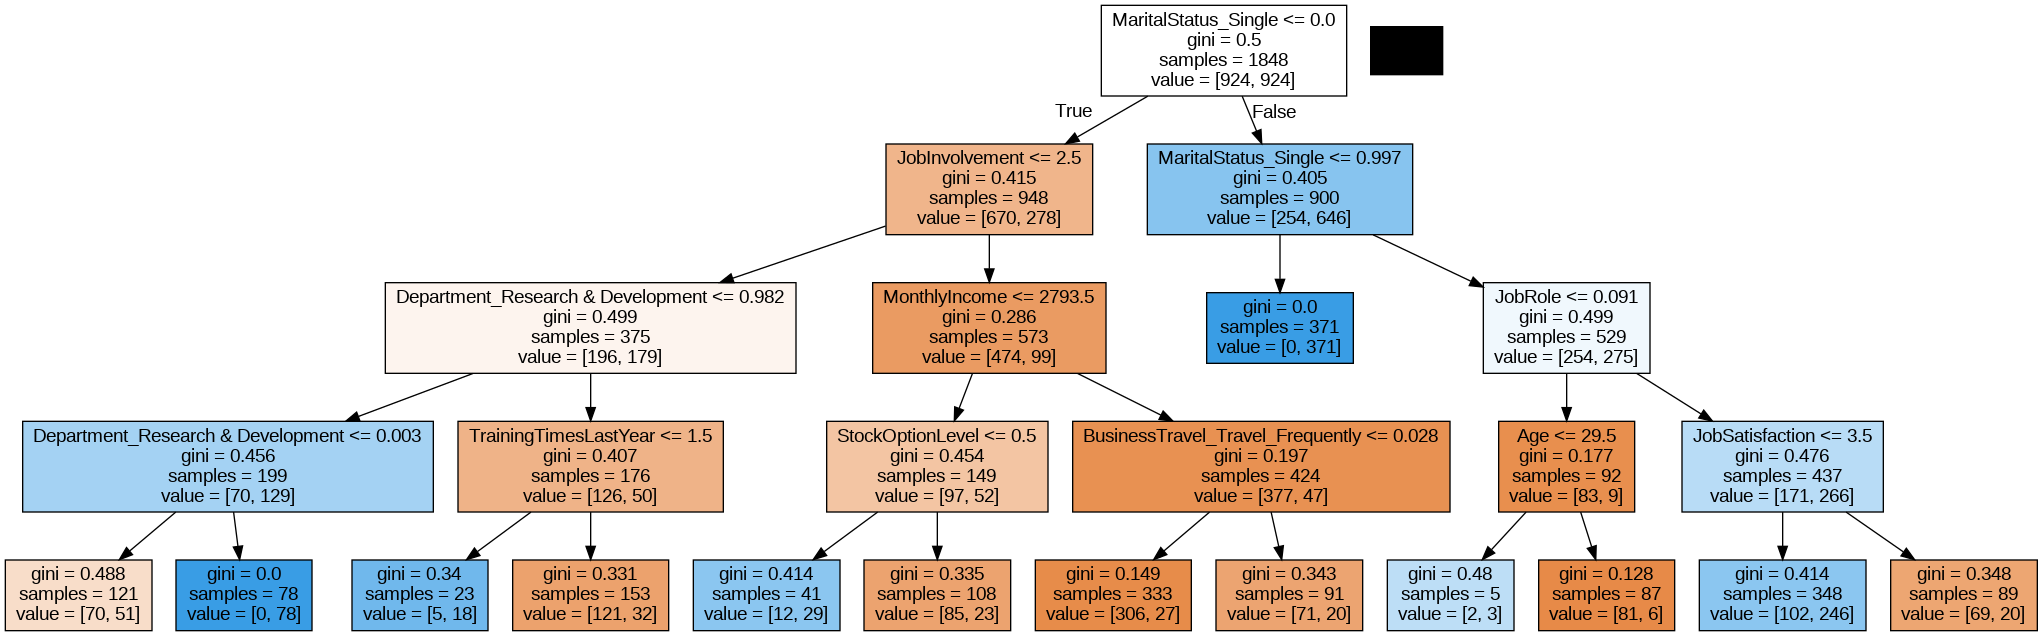

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Did you notice the depth of the tree?
- Neither too large
- Nor too low

\
#### What can we infer from this?

If you notice the leaves,
- not all of them are pure.
- This means lesser variance.

### Confusion Matrix

Plotting the confusion matrix for test data -

Recall the **TP**, **TN**, **FN**, **FP** we discussed earlier.


Text(0.5, 23.52222222222222, 'Predicted label')

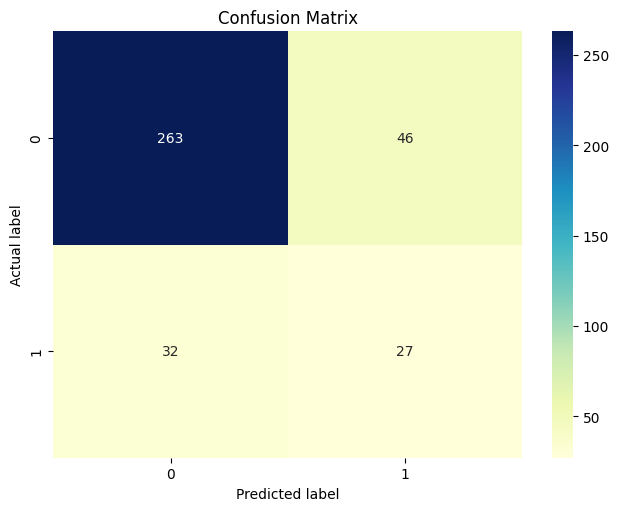

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

What did you notice?

- Model is classifying class 0 quite well.
- However, the number of FN is large.

---

#### Code Walkthrough

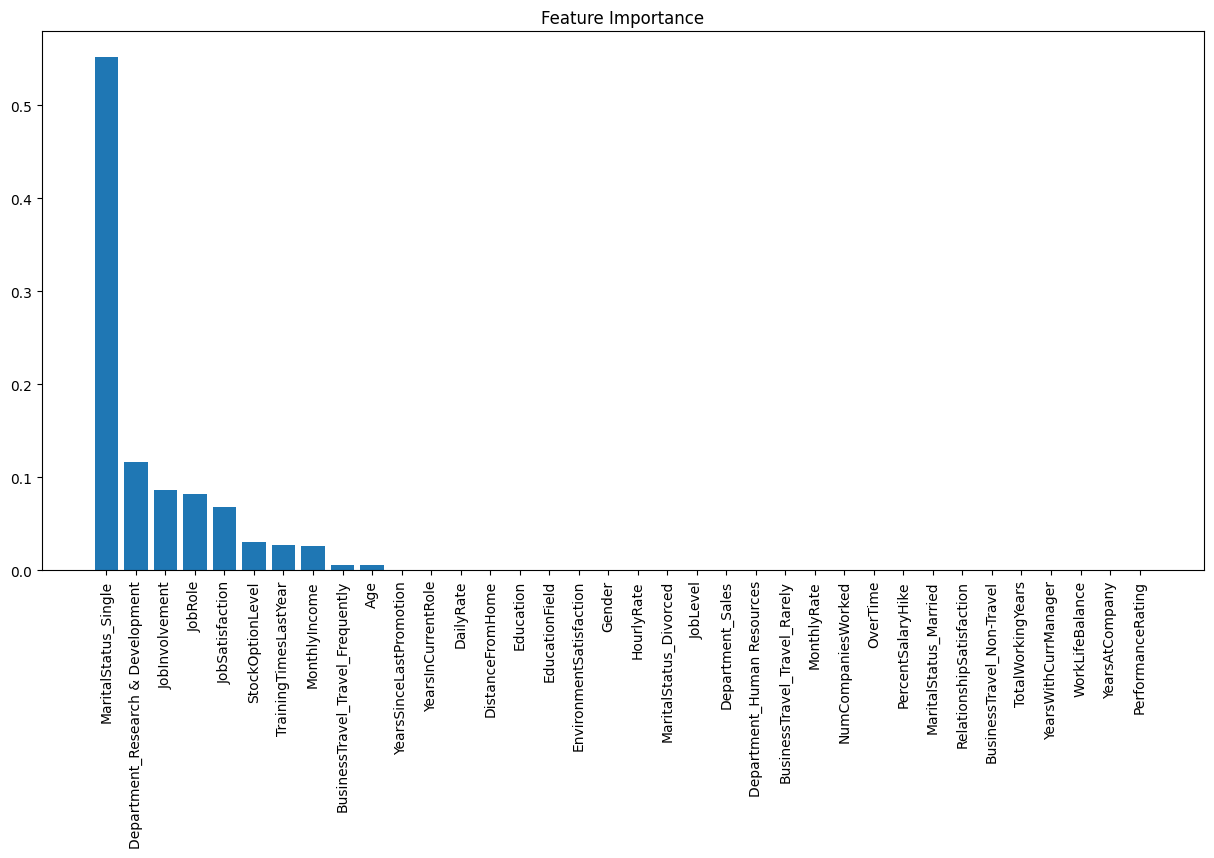

In [ ]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(list(X_train.columns))):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MaritalStatus_Single,0.551861
1,Department_Research & Development,0.116828
2,JobInvolvement,0.086921
3,JobRole,0.082005
4,JobSatisfaction,0.068126
5,StockOptionLevel,0.030027
6,TrainingTimesLastYear,0.027184
7,MonthlyIncome,0.025852
8,BusinessTravel_Travel_Frequently,0.005684
9,Age,0.005513


#### What can we infer from the above graph?

- `MaritalStatus_Single` is the most important feature.
- Followed by `Department_Research & Development`, `JobInvolvement` and `JobRole`.

---

### Sklearn Implementation

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_validate
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!gdown 176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO

Downloading...
From: https://drive.google.com/uc?id=176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO
To: /content/regData.csv
100% 13.4k/13.4k [00:00<00:00, 26.9MB/s]


In [ ]:
regression_data = pd.read_csv('regData.csv')

In [ ]:
regression_data.head()

,X,Y
0,1,1.018138
1,2,0.813685
2,3,0.795484
3,4,0.860005
4,5,0.990648


In [ ]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       600 non-null    int64  
 1   Y       600 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.5 KB


There are total of 600 datapoints

In [ ]:
X = regression_data['X']
y = regression_data['Y']

#### Plotting data

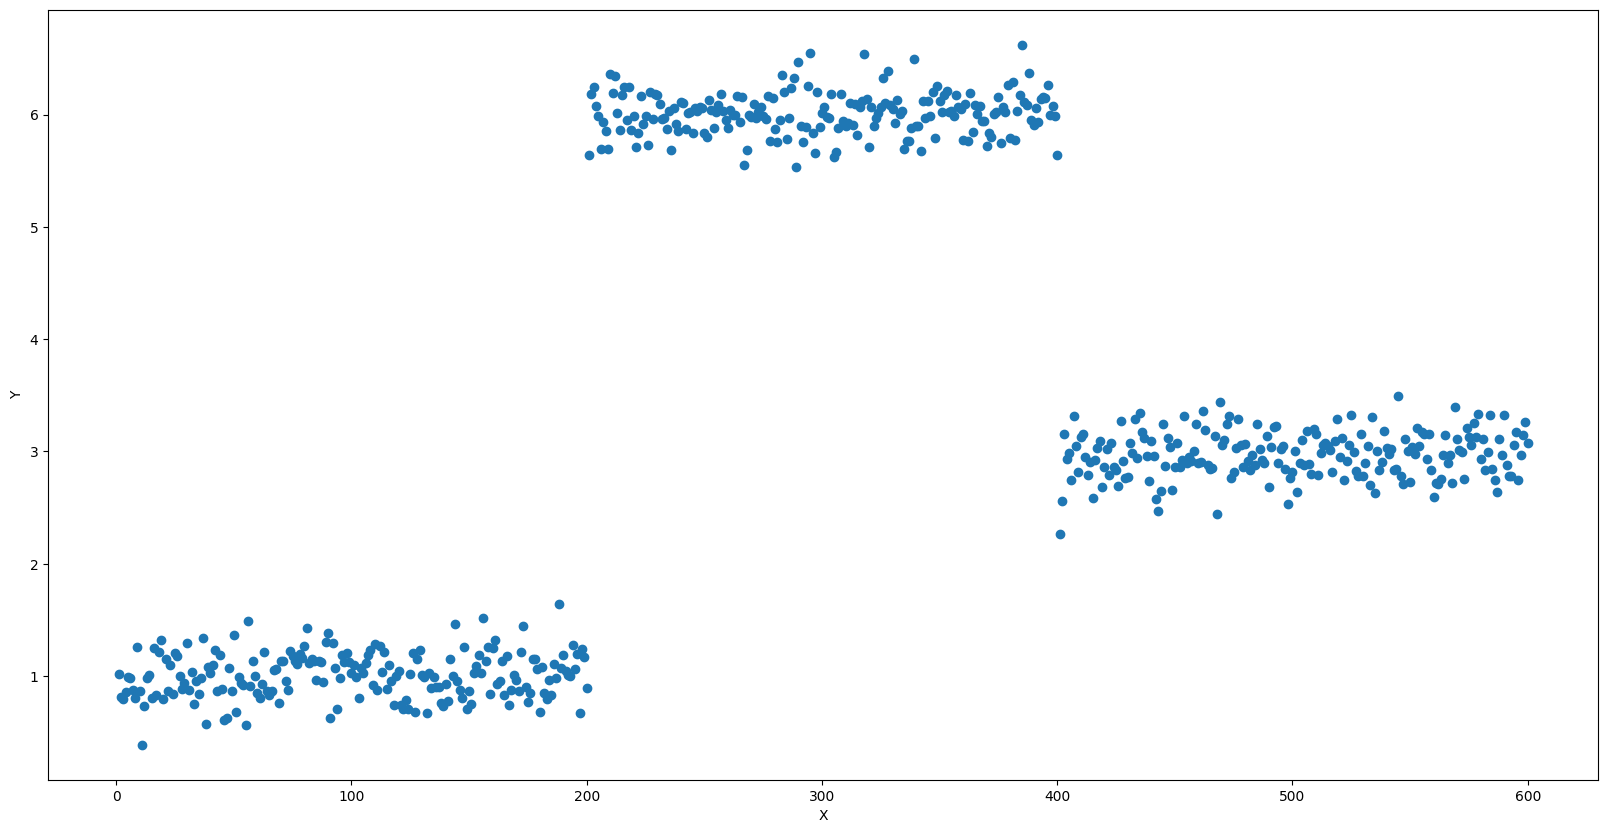

In [ ]:
plt.figure(figsize = (20,10))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Notice that,
- simple linear regression will fail to fit a line on this type of data.

#### Splitting data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=43,
                                                    shuffle = True)

In [ ]:
X_train = X_train.values.reshape(-1,1)

In [ ]:
y_train = y_train.values

In [ ]:
depths = [1,2,3,5,6,7,9,11]

for depth in depths:
    tree_reg = DecisionTreeRegressor(random_state=7, max_depth = depth, min_samples_split = 10, min_samples_leaf = 20)

    kfold = KFold(n_splits=3)

    # scoring is taken as negative mse as we maximize the scoring. maximizing negative MSE is same as minimizing MSE.
    cv_acc_results = cross_validate(tree_reg, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error', return_train_score = True)

    print(f"K-Fold for depth:{depth} -ve MSE Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print('***************')

K-Fold for depth:1 -ve MSE Mean: Train: -157.29484407813618 Validation: -161.85220982964185
***************
K-Fold for depth:2 -ve MSE Mean: Train: -4.022779524301007 Validation: -13.41631105078697
***************
K-Fold for depth:3 -ve MSE Mean: Train: -3.889896491712604 Validation: -13.530023054703413
***************
K-Fold for depth:5 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:6 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:7 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:9 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:11 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************




Notice, the regressor is overfitting.
- This could be bcoz we have very less datapoints for training.
- We can also try tuning the hyperparameters.



#### Visualizing Decision Tree

In [ ]:
features = list(regression_data.columns[0])

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=7, max_depth = 2, min_samples_split = 20 )
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_split=20, random_state=7)

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

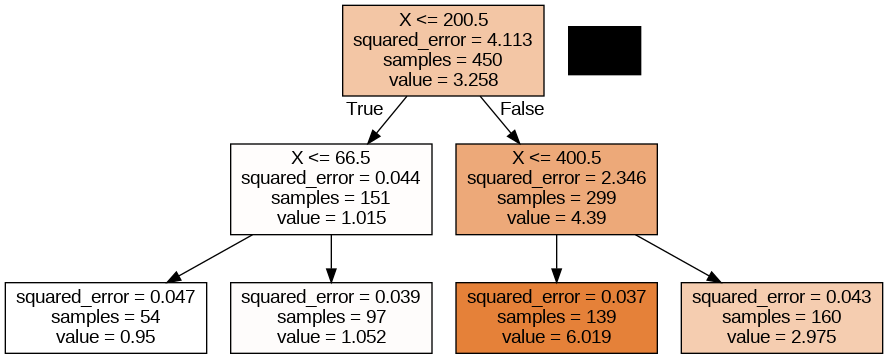

In [ ]:
dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

#### Visualizing Regression Line

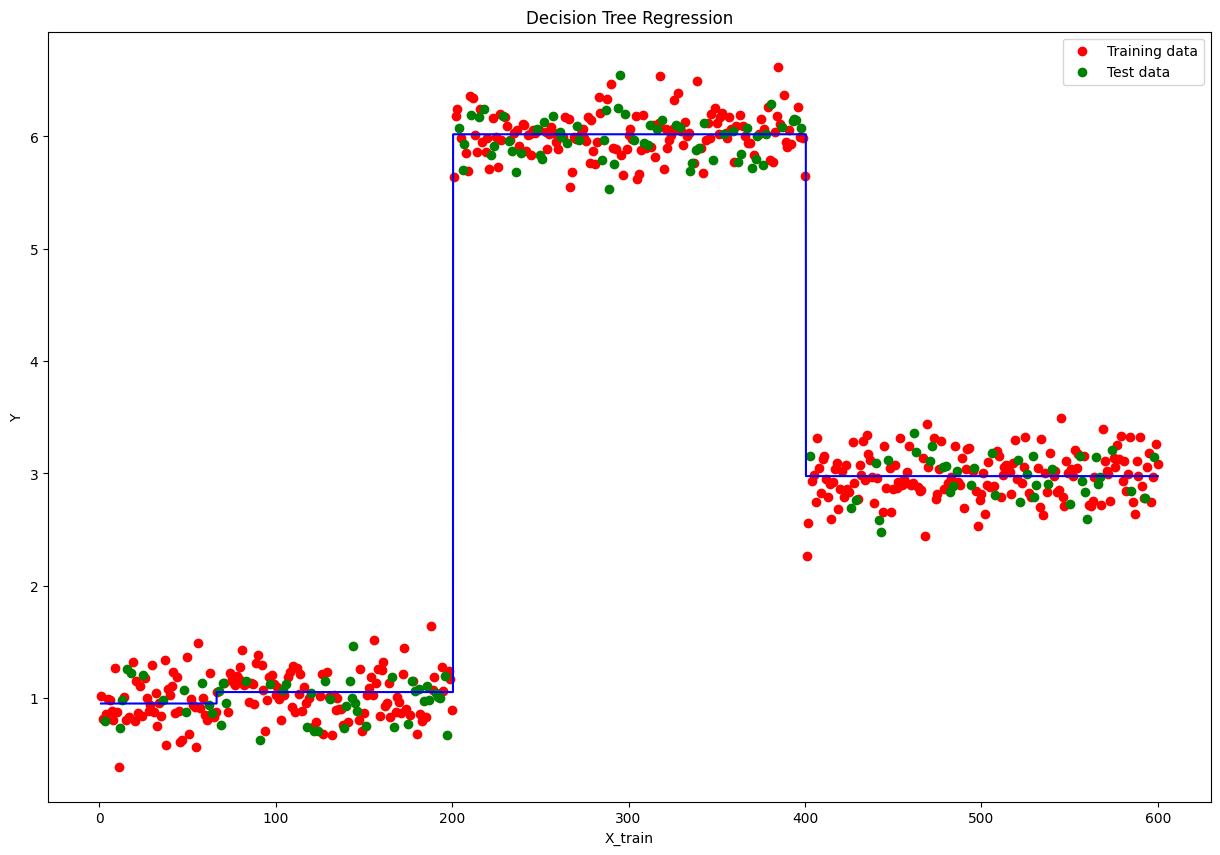

In [ ]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize = (15,10))
plt.scatter(X_train, y_train, color = 'red', label = 'Training data')
plt.scatter (X_test, y_test, color = 'green', label = 'Test data')
plt.plot(X_grid, tree_reg.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('X_train')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /content/HR-Employee-Attrition.csv
100% 228k/228k [00:00<00:00, 21.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 22.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 15.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 27.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 15.8MB/s]


In [ ]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=7, max_depth=4)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=7)

In [ ]:
print("Train accuracy: {:.2f}".format(tree_clf.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(tree_clf.score(X_test, y_test)*100))

Train accuracy: 83.77
Test accuracy: 78.80


### Code Implementation - RF

Let's try to train a RF classifier for our problem.

In [ ]:
# Load data (deserialize)

with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y = pickle.load(handle)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)

In [ ]:
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 88.41 
 Validation: 84.26
K-Fold Accuracy Std: 
 Train: 0.45, 
 Validation: 5.96


As we can see that,
- the test accuracy has increased
- From **78%** to **84%**

In [ ]:
# Defining parameters -

params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

In [ ]:
grid.fit(X, y)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'n_estimators': 100}
Best score:  0.9036796536796537


In [ ]:
clf2 = RandomForestClassifier(random_state=7, bootstrap=False, criterion='gini',
                              max_depth=10, max_features=8, n_estimators=200)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(clf2, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.3f} \n Validation: {cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.3f}, \n Validation: {cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train: 99.657 
 Validation: 91.999
K-Fold Accuracy Std: 
 Train: 0.085, 
 Validation: 6.801


Let's try finding the optimal value of `ccp_alpha` for our model.

In [ ]:
# Defining parameters -

from scipy.stats import uniform

params = {'ccp_alpha': uniform(loc=0, scale=0.4)}
# sample from uniform dist between 0 to 0.4

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=7, bootstrap=False, criterion='gini',
                                                               max_depth=10, max_features=8, n_estimators=200),
                            param_distributions = params,
                            scoring = 'accuracy',
                            cv = 3,
                            n_iter=15,
                            n_jobs=-1
                            )

In [ ]:
random.fit(X, y)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'ccp_alpha': 0.0028886522988705644}
Best score:  0.8733766233766235


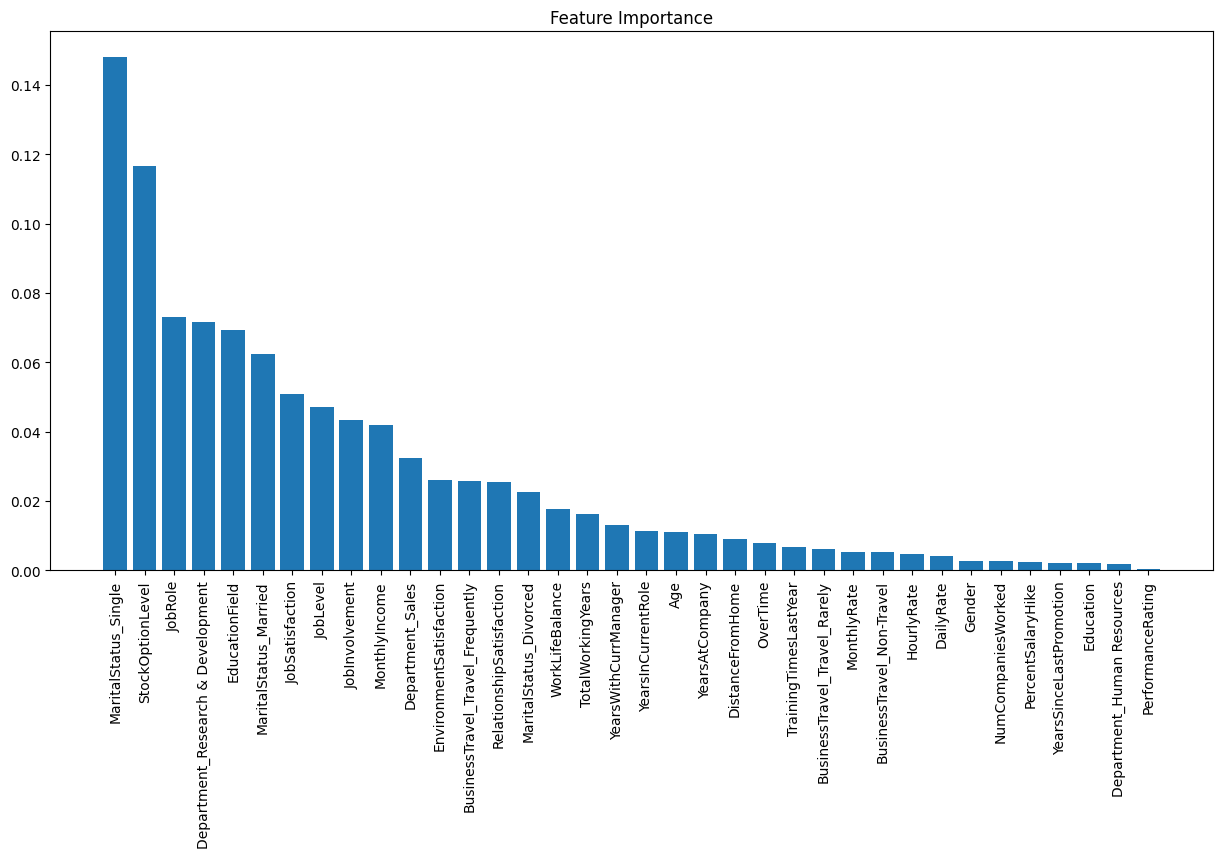

In [ ]:
# Feature Importance

import matplotlib.pyplot as plt

rf_clf.fit(X, y)
importances = rf_clf.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

## Sklearn implemntation

Let's implement it on the one of the previously used dataset
- Employee attrition dataset (used in DT)

In [ ]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 21.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 68.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 29.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 25.0MB/s]


In [ ]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

:Now, let's import the class from sklearn

sklearn GBDT: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=150, max_depth=2, loss = 'log_loss')

In [ ]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=150)

In [ ]:
gbc.score(X_test, y_test)

0.8804347826086957

In [ ]:
gbc.score(X_train, y_train)

0.948051948051948

Model is slightly overfitting.


Do Note that:
- It is very easy to overfit the boosting model
- So, we have to careful while tuning it.

We'll see in next lecture how to regularize GBDT





#### Problem Statement:
- Your task is to classify these EMG signals into 20 different physical actions
- This will then be used for controlling the robotics arm.

#### What is EMG (ElectroMioGraphy) ?
  - Technique to study electrical signals produced by muscular movement.

#### Dataset
- You have a dataset of EMG signals from 4 subjects/people.

#### How was the data collected ?
  - Subject was asked to perform specific physical actions
  - Signals produced due to that movement were recorded over time.
  - 8 channels were used to record the signals
  - Channels here correspond to muscles\
    For eg: Right-hand bicep
  - Frequency : 10 $ms^{-1}$

Now, lets import some libs at first.

 Source: https://archive.ics.uci.edu/ml/datasets/EMG+Physical+Action+Data+Set

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn

#### Extracting data

In [ ]:
!gdown 1h86M8si2YT-aI4Zec1MeMP_mPYsLPy5F

Downloading...
From: https://drive.google.com/uc?id=1h86M8si2YT-aI4Zec1MeMP_mPYsLPy5F
To: /content/emg.rar
100% 18.6M/18.6M [00:00<00:00, 42.6MB/s]


In [ ]:
# x is extract

!unrar x "./emg.rar" "./"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from ./emg.rar

Creating    ./EMG Physical Action Data Set                            OK
Extracting  ./EMG Physical Action Data Set/readme.txt                      0%  OK 
Creating    ./EMG Physical Action Data Set/sub1                       OK
Creating    ./EMG Physical Action Data Set/sub1/Aggressive            OK
Creating    ./EMG Physical Action Data Set/sub1/Aggressive/log        OK
Extracting  ./EMG Physical Action Data Set/sub1/Aggressive/log/Elbowing.log       0%  OK 
Extracting  ./EMG Physical Action Data Set/sub1/Aggressive/log/FrontKicking.log       0%  1%  OK 
Extracting  ./EMG Physical Action Data Set/sub1/Aggressive/log/Hamering.log       1%  OK 
Extracting  ./EMG Physical Action Data Set/sub1/Aggressive/log/Headering.log       1%  2%  OK 
Extracting  ./EMG Physical Action Data Set/sub1/Aggressive/log/Kneeing.log       2%  OK

#### Visualizing file structure

In [ ]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (134 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 120880 files and directories currently install

In [ ]:
!tree "./EMG Physical Action Data Set/sub1"

./EMG Physical Action Data Set/sub1
├── Aggressive
│   ├── log
│   │   ├── Elbowing.log
│   │   ├── FrontKicking.log
│   │   ├── Hamering.log
│   │   ├── Headering.log
│   │   ├── Kneeing.log
│   │   ├── Pulling.log
│   │   ├── Punching.log
│   │   ├── Pushing.log
│   │   ├── SideKicking.log
│   │   └── Slapping.log
│   └── txt
│       ├── Elbowing.txt
│       ├── Frontkicking.txt
│       ├── Hamering.txt
│       ├── Headering.txt
│       ├── Kneeing.txt
│       ├── Pulling.txt
│       ├── Punching.txt
│       ├── Pushing.txt
│       ├── Sidekicking.txt
│       └── Slapping.txt
└── Normal
    ├── log
    │   ├── Bowing.log
    │   ├── Clapping.log
    │   ├── Handshaking.log
    │   ├── Hugging.log
    │   ├── Jumping.log
    │   ├── Running.log
    │   ├── Seating.log
    │   ├── Standing.log
    │   ├── Walking.log
    │   └── Waving.log
    └── txt
        ├── Bowing.txt
        ├── Clapping.txt
        ├── Handshaking.txt
        ├── Hugging.txt
        ├── Jumping.txt
        ├── 

Here if you see for subject 1 , we have  sub folders
- aggressive and
- normal

These folders mention the aggresive and normal activities respectively with corresponding log and txt files

We will use txt files


Let's see one of the folder from above

In [ ]:
!ls -lrt ./EMG\ Physical\ Action\ Data\ Set/sub1/Aggressive/txt/

total 3768
-rw-r--r-- 1 root root 361096 Feb  7  2010 Slapping.txt
-rw-r--r-- 1 root root 388912 Feb  7  2010 Sidekicking.txt
-rw-r--r-- 1 root root 379428 Feb  7  2010 Pushing.txt
-rw-r--r-- 1 root root 379597 Feb  7  2010 Punching.txt
-rw-r--r-- 1 root root 387656 Feb  7  2010 Pulling.txt
-rw-r--r-- 1 root root 398523 Feb  7  2010 Kneeing.txt
-rw-r--r-- 1 root root 350285 Feb  7  2010 Headering.txt
-rw-r--r-- 1 root root 402363 Feb  7  2010 Hamering.txt
-rw-r--r-- 1 root root 390158 Feb  7  2010 Frontkicking.txt
-rw-r--r-- 1 root root 398095 Feb  7  2010 Elbowing.txt


#### Reading data

Now, let's see what is the data in slapping.txt

In [ ]:
!cat ./EMG\ Physical\ Action\ Data\ Set/sub1/Aggressive/txt/Slapping.txt

Streaming output truncated to the last 5000 lines.
-814	-49	-25	64	-746	174	-1034	-301
-1344	252	-90	90	158	107	-998	-506
-1674	498	-129	162	988	77	-1136	-602
-1801	537	-86	-120	692	67	-1458	-778
-1735	461	-45	-397	320	143	-1781	-1404
-1674	363	8	-82	-295	90	-2096	-2259
-1581	254	69	111	-274	58	-2223	-2456
-1296	108	12	-76	-11	42	-2312	-1387
-1010	-4	-52	-15	-217	-11	-2577	-130
-740	-75	-21	122	-408	-33	-2707	716
-554	-21	18	221	-525	-37	-2573	1085
-444	-12	1	65	772	-94	-2385	1056
-272	-99	33	-10	2822	-141	-2223	1270
-218	-130	64	38	3851	-143	-2079	1452
-156	-92	61	-21	3725	-126	-2039	1332
-117	-87	62	-23	3428	-105	-2076	1150
-66	-98	36	-72	2968	-125	-2009	710
2	-137	23	-18	2125	-116	-1962	389
67	-203	15	6	2243	-55	-1962	448
103	-231	52	12	2378	-22	-2043	731
100	-215	93	10	2321	-26	-1781	817
55	-122	83	4	2813	-63	-1262	621
33	-106	14	2	3474	-68	-941	535
59	-98	-4	18	2711	-55	-774	451
90	-145	-35	32	1721	-74	-375	408
216	-277	-56	35	1474	-66	-158	304
281	-297	-47	56	-61	-125	-216	230
25

**Key observations**

* We got eight columns of the data which corresponds to eight electrodes
* We are collecting data 10 times per millisecond,
- each row gives the data for every 0.1 millisecond

After this, we perform series of preprocessing on the data

#### Preprocessed Data


In [ ]:
import pickle

!gdown 171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
!gdown 1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
!gdown 1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
!gdown 1zLDUErwKdmF-RacOyHEuI_z_46LssQtP


with open('X_train.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('Y_train.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('Y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

Downloading...
From: https://drive.google.com/uc?id=171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
To: /content/Y_test.pickle
100% 31.7k/31.7k [00:00<00:00, 71.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
To: /content/X_test.pickle
100% 253k/253k [00:00<00:00, 16.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
To: /content/Y_train.pickle
100% 126k/126k [00:00<00:00, 16.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zLDUErwKdmF-RacOyHEuI_z_46LssQtP
To: /content/X_train.pickle
100% 1.01M/1.01M [00:00<00:00, 31.2MB/s]


### Modeling

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [3, 5, 7, 10, 15],
    "max_leaf_nodes" : [20, 40, 60]
}

model1 = DTC()
clf = GridSearchCV(model1, params, scoring = "accuracy", cv=5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10, 15],
                         'max_leaf_nodes': [20, 40, 60]},
             scoring='accuracy')

Lets see the results of our GridSearch

In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'max_depth': 3, 'max_leaf_nodes': 20} Mean_score: 0.34202167978841097 Rank: 15
Parameters:{'max_depth': 3, 'max_leaf_nodes': 40} Mean_score: 0.34208509132931136 Rank: 13
Parameters:{'max_depth': 3, 'max_leaf_nodes': 60} Mean_score: 0.34208509132931136 Rank: 13
Parameters:{'max_depth': 5, 'max_leaf_nodes': 20} Mean_score: 0.44640960557136655 Rank: 12
Parameters:{'max_depth': 5, 'max_leaf_nodes': 40} Mean_score: 0.446726703498857 Rank: 10
Parameters:{'max_depth': 5, 'max_leaf_nodes': 60} Mean_score: 0.446726703498857 Rank: 10
Parameters:{'max_depth': 7, 'max_leaf_nodes': 20} Mean_score: 0.6328638103920514 Rank: 9
Parameters:{'max_depth': 7, 'max_leaf_nodes': 40} Mean_score: 0.6349567733601541 Rank: 8
Parameters:{'max_depth': 7, 'max_leaf_nodes': 60} Mean_score: 0.6351470280943495 Rank: 7
Parameters:{'max_depth': 10, 'max_leaf_nodes': 20} Mean_score: 0.6976794754761447 Rank: 5
Parameters:{'max_depth': 10, 'max_leaf_nodes': 40} Mean_score: 0.773402086487067 Rank: 4
Parameters:{

#### So whats the best estimator and score ?

In [ ]:
print(clf.best_estimator_)


DecisionTreeClassifier(max_depth=15, max_leaf_nodes=60)


In [ ]:
clf = DTC(**clf.best_params_)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=60)

##### Train score

In [ ]:
clf.score(X_train, y_train)

0.8223617453069508

##### Test score


In [ ]:
clf.score(X_test, y_test)

0.8125792543748415

#### RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt

params = {
    "n_estimators": [10,25,50,100,150,200],
    "max_depth" : [3, 5, 10, 15, 20],
    "max_leaf_nodes" : [20, 40, 80]
}

rfc = RFC(n_jobs = -1)
clf = RandomizedSearchCV(rfc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()
clf.fit(X_train, y_train)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'n_estimators': 25, 'max_leaf_nodes': 40, 'max_depth': 10} Mean_score: 0.8470953830542872 Rank: 6
Parameters:{'n_estimators': 25, 'max_leaf_nodes': 80, 'max_depth': 15} Mean_score: 0.8895230847285642 Rank: 2
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 80, 'max_depth': 20} Mean_score: 0.8906646372399797 Rank: 1
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 20, 'max_depth': 3} Mean_score: 0.6740233384069002 Rank: 10
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 80, 'max_depth': 10} Mean_score: 0.878234398782344 Rank: 4
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 80, 'max_depth': 5} Mean_score: 0.7347158802638255 Rank: 9
Parameters:{'n_estimators': 25, 'max_leaf_nodes': 80, 'max_depth': 5} Mean_score: 0.7456240487062405 Rank: 8
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 80, 'max_depth': 15} Mean_score: 0.8893962455606291 Rank: 3
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 80, 'max_depth': 15} Mean_score: 0.8718290208016235 Rank: 5
Parameters:

Notice that,

The performance of RF (0.89) is better than DT (0.81)

In [ ]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:00:26.123114


In [ ]:
print(clf.best_estimator_)

RandomForestClassifier(max_depth=20, max_leaf_nodes=80, n_jobs=-1)


In [ ]:
rf = clf.best_estimator_

rf.fit(X_train, y_train)

print("Model acc",rf.score(X_test, y_test))



Model acc 0.8922140502155719


#### GBDT

In [ ]:
params = {
    "n_estimators": [50,100,150,200],
    "max_depth" : [3, 4, 5, 7],
    "max_leaf_nodes" : [20, 40, 80],
    "learning_rate": [0.1, 0.2, 0.3]
}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt


gbc = GBC()
clf = RandomizedSearchCV(gbc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()

clf.fit(X_train, y_train)

end = dt.datetime.now()



Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'n_estimators': 100, 'max_leaf_nodes': 20, 'max_depth': 7, 'learning_rate': 0.1} Mean_score: 0.9474251648909183 Rank: 3
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 20, 'max_depth': 4, 'learning_rate': 0.1} Mean_score: 0.9438736681887366 Rank: 4
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 20, 'max_depth': 5, 'learning_rate': 0.3} Mean_score: 0.9351217656012176 Rank: 7
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 20, 'max_depth': 4, 'learning_rate': 0.1} Mean_score: 0.9259893455098934 Rank: 9
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 20, 'max_depth': 5, 'learning_rate': 0.3} Mean_score: 0.9538939624556063 Rank: 1
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 20, 'max_depth': 3, 'learning_rate': 0.3} Mean_score: 0.9244672754946728 Rank: 10
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 20, 'max_depth': 3, 'learning_rate': 0.2} Mean_score: 0.9382293252156266 Rank: 5
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 20, 'max_depth': 3, 'learni

In [ ]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:48:00.395686


In [ ]:
print(clf.best_estimator_)

GradientBoostingClassifier(learning_rate=0.3, max_depth=5, max_leaf_nodes=20,
                           n_estimators=200)


In [ ]:
gbc = clf.best_estimator_

gbc.fit(X_train, y_train)

print("Model acc",gbc.score(X_test, y_test))



Model acc 0.9698199340603602


Notice that
- It took us > 30 mins to hyperparam tune sklearn GBDT  (slow)
- Test accuracy: 0.96 (better than RF)

## Content

If you want to dive deep into it,

here's the link to the research paper: https://www.kdd.org/kdd2016/papers/files/rfp0697-chenAemb.pdf
- published in 2016

Let's look into the numerous hyperparams provided by XGBoost

### Hyperparameters

XGBoost doc: https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier

### Code walkthrough

In [ ]:
import pickle

!gdown 171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
!gdown 1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
!gdown 1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
!gdown 1zLDUErwKdmF-RacOyHEuI_z_46LssQtP


with open('X_train.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('Y_train.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('Y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

Downloading...
From: https://drive.google.com/uc?id=171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
To: /content/Y_test.pickle
100% 31.7k/31.7k [00:00<00:00, 69.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
To: /content/X_test.pickle
100% 253k/253k [00:00<00:00, 42.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
To: /content/Y_train.pickle
100% 126k/126k [00:00<00:00, 34.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zLDUErwKdmF-RacOyHEuI_z_46LssQtP
To: /content/X_train.pickle
100% 1.01M/1.01M [00:00<00:00, 30.8MB/s]


In [ ]:

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt

params = {
        "n_estimators": [50,100,150,200],
        "max_depth" : [3, 4, 5, 7],
        "learning_rate": [0.1, 0.2, 0.3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }
xgb = XGBClassifier(objective='multi:softmax', num_class=20, silent=True)




In [ ]:

random_search = RandomizedSearchCV(xgb,
                                   param_distributions=params,
                                   n_iter=10,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   cv=3,
                                   verbose=2)


start = dt.datetime.now()
random_search.fit(X_train, y_train)
end = dt.datetime.now()


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:20:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
res = random_search.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'subsample': 1.0, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8} Mean_score: 0.9466007102993403 Rank: 6
Parameters:{'subsample': 0.8, 'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8} Mean_score: 0.9289700659563674 Rank: 7
Parameters:{'subsample': 0.6, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.6} Mean_score: 0.9627092846270928 Rank: 2
Parameters:{'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8} Mean_score: 0.914066463723998 Rank: 10
Parameters:{'subsample': 1.0, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8} Mean_score: 0.9639776763064435 Rank: 1
Parameters:{'subsample': 1.0, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.3, 'colsample_bytree': 0.8} Mean_score: 0.9222475900558093 Rank: 8
Parameters:{'subsample': 0.8, 'n_estimators': 150, 'max_depth': 5, 'learning_rate':

In [ ]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:01:21.994459


In [ ]:
print(random_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=20,
              num_parallel_tree=None, ...)


In [ ]:
xgb = random_search.best_estimator_

xgb.fit(X_train, y_train)

print("Model acc",xgb.score(X_test, y_test))



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:21:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Model acc 0.9774283540451433


Notice that
- It took us 10 mins to hyperparam tune XGB vs > 30 mins in sklearn GBDT


## LightGBM

Research paper link: https://proceedings.neurips.cc/paper_files/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Paper.pdf



### What makes LightGBM faster?

This is what LightGBM does with its optimization

 Let's look into that

#### GOSS (Gradient-based One-Side Sampling)

If you want to deep dive into it,

here a blog explaining it in detail: https://towardsdatascience.com/what-makes-lightgbm-lightning-fast-a27cf0d9785e

Let's look into how can we implement it

### Code walkthough

Documentation: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#Refer: https://lightgbm.readthedocs.io/en/latest/Parameters.html
import datetime as dt
gridParams = {
    'learning_rate': [0.1, 0.3, 0.5],
    'boosting_type' : ['gbdt'],
    'objective' : ['multiclass'],
    'max_depth' : [5,6,7,8],
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'metric':['multi_error'],
    }

clf = lgb.LGBMClassifier(num_classes=20)
random_cv = RandomizedSearchCV(clf,gridParams,verbose=3,cv=3,n_jobs = -1,n_iter=10)



In [ ]:
start = dt.datetime.now()
random_cv.fit(X_train,y_train)
end = dt.datetime.now()


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 15768, number of used features: 8
[LightGBM] [Info] Start training from score -2.982377
[LightGBM] [Info] Start training from score -2.993705
[LightGBM] [Info] Start training from score -3.016753
[LightGBM] [Info] Start training from score -2.986139
[LightGBM] [Info] Start training from score -3.010297
[LightGBM] [Info] Start training from score -3.014166
[LightGBM] [Info] Start training from score -3.037696
[LightGBM] [I

In [ ]:
res = random_cv.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'subsample': 0.5, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 8, 'learning_rate': 0.3, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'} Mean_score: 0.9681633688483003 Rank: 2
Parameters:{'subsample': 0.5, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'} Mean_score: 0.9595383054287163 Rank: 4
Parameters:{'subsample': 0.5, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'} Mean_score: 0.9687975646879757 Rank: 1
Parameters:{'subsample': 0.5, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 7, 'learning_rate': 0.5, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'} Mean_score: 0.11339421613394217 Rank: 9
Parameters:{'subsample': 0.5, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 8, 'learning_rate': 0.5, 'colsample_bytree': 0.5, 'boosting_type': '

In [ ]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:01:00.059591


In [ ]:
print(random_cv.best_estimator_)

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.3, max_depth=5,
               metric='multi_error', num_classes=20, objective='multiclass',
               subsample=0.5)


In [ ]:
lgb = random_cv.best_estimator_

lgb.fit(X_train, y_train)

print("Model acc",lgb.score(X_test, y_test))



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 15768, number of used features: 8
[LightGBM] [Info] Start training from score -2.982377
[LightGBM] [Info] Start training from score -2.993705
[LightGBM] [Info] Start training from score -3.016753
[LightGBM] [Info] Start training from score -2.986139
[LightGBM] [Info] Start training from score -3.010297
[LightGBM] [Info] Start training from score -3.014166
[LightGBM] [Info] Start training from score -3.037696
[LightGBM] [Info] Start training from score -3.011585
[LightGBM] [Info] St

Notice that
- It only took 57 sec to train
- and its performance is comparable to XGBoost implementation

Now, that we are finished with GBDT.

Let's learn about some other ensemble techniques

### Code implementation of Linear SVM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
!gdown 1QViUZJ5UIBCgxB_qbOXTLs_2V48w7MWo

df = pd.read_csv('Spam_processed.csv', encoding='latin-1')
df.dropna(inplace = True)

Downloading...
From: https://drive.google.com/uc?id=1QViUZJ5UIBCgxB_qbOXTLs_2V48w7MWo
To: /content/Spam_processed.csv
100% 767k/767k [00:00<00:00, 26.9MB/s]


In [ ]:
df

,type,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u å750 pound prize ...
5568,0,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,0,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


- Performing train-test split
- with [CountVectorization](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- and StandardScaler.

In [ ]:
from sklearn.model_selection import train_test_split

df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'],
                                                          test_size=0.25, random_state=47)
print([np.shape(df_X_train), np.shape(df_X_test)])

# CountVectorizer
f = feature_extraction.text.CountVectorizer()
X_train = f.fit_transform(df_X_train)
X_test = f.transform(df_X_test)

# StandardScaler
scaler = StandardScaler(with_mean=False) # problems with dense matrix
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print([np.shape(X_train), np.shape(X_test)])
print(type(X_train))

[(4173,), (1392,)]
[(4173, 7622), (1392, 7622)]
<class 'scipy.sparse._csr.csr_matrix'>


Let's train Linear SVM on the given Spam/Ham data.


In [ ]:
# SVC

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

params = {
          'C': [1e-4,  0.001, 0.01, 0.1, 1,10] # which hyperparam value of C do you think will work well?
         }

svc = SVC(class_weight={ 0:0.1, 1:0.5 }, kernel='linear')
clf = GridSearchCV(svc, params, scoring = "f1", cv=3)

clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=SVC(class_weight={0: 0.1, 1: 0.5}, kernel='linear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}, scoring='f1')

In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} \n Mean score: {res['mean_test_score'][i]} \n Rank: {res['rank_test_score'][i]}")

Parameters:{'C': 0.0001} 
 Mean score: 0.6566305780023073 
 Rank: 6
Parameters:{'C': 0.001} 
 Mean score: 0.7742322485787693 
 Rank: 1
Parameters:{'C': 0.01} 
 Mean score: 0.767533370474547 
 Rank: 2
Parameters:{'C': 0.1} 
 Mean score: 0.7649416969151316 
 Rank: 3
Parameters:{'C': 1} 
 Mean score: 0.7649416969151316 
 Rank: 3
Parameters:{'C': 10} 
 Mean score: 0.7649416969151316 
 Rank: 3


As you can see,
- we get the best performance when $C=0.001$,
- with F1 Score of 0.77.

\
Now implementing this SVM on the test data.

In [ ]:
svc = SVC(C=0.001,class_weight={ 0:0.1, 1:0.5 }, kernel='linear')

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(metrics.f1_score(y_test,y_pred))

0.8908554572271387


Linear SVM performs much well
- on the Spam/Ham data
- with F1 Score of 0.88
- when using class weights.

Let's plot its curve and see how it looks.

Desmos plot: https://www.desmos.com/calculator/maidcnyvlz

In [ ]:
from IPython.display import IFrame

In [ ]:
IFrame(src="https://www.desmos.com/calculator/maidcnyvlz", width=700, height=375)

<img src='https://drive.google.com/uc?id=1dotGsTn8B0fvyxaoPSO7bxsf6h2uzcNT' width='800'>

Let's implement Kernel SVM on a dataset.

### Code Walkthrough

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

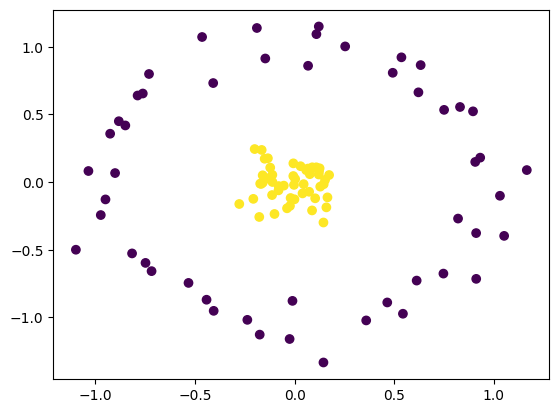

In [ ]:
# create a non-linear dataset

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### Linear kernel SVM

SVM sklearn doc: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn-svm-svc

In [ ]:
from sklearn.svm import SVC

In [ ]:
# try using svm with linear kernel
clf = SVC(kernel='linear').fit(X, y)

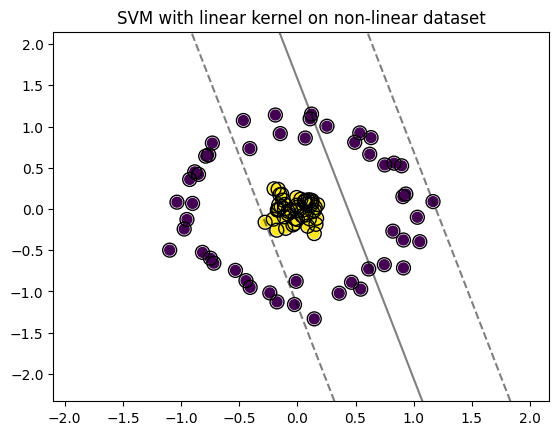

In [ ]:
# plot the decision function

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.title("SVM with linear kernel on non-linear dataset")

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

### RBF kernel SVM

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

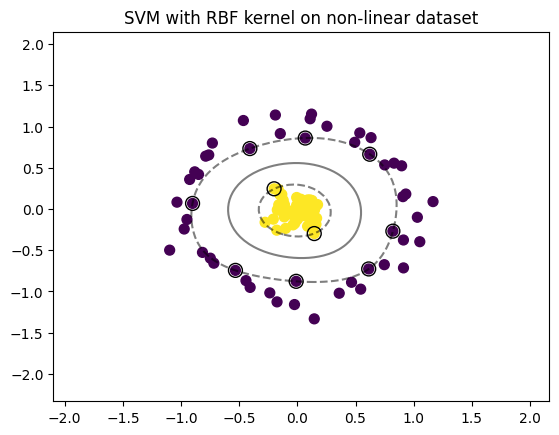

In [ ]:
#plot RBF kernel

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.title("SVM with RBF kernel on non-linear dataset")

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

### Extra Read - SVR (Support Vector Regression)

Colab link: https://colab.research.google.com/drive/1RF1_isWlDEQFeLKrfmprWP6IMwGEVIfr?usp=sharing